In [ ]:
! pip install bertopic

In [1]:
! pip install swifter
! pip install pandas
! pip install textacy
! pip install spacy
! python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import random
import copy
# from bertopic import BERTopic
import pickle
# import textacy

pd.options.plotting.backend = "plotly"
random.seed(42)

In [3]:
# feb_21 = pd.read_csv('/content/drive/MyDrive/whole_day/21_feb.csv')
# feb_22 = pd.read_csv('/content/drive/MyDrive/whole_day/22_feb.csv')
# feb_23 = pd.read_csv('/content/drive/MyDrive/whole_day/23_feb.csv')
# feb_24 = pd.read_csv('/content/drive/MyDrive/whole_day/24_feb.csv')
# feb_25 = pd.read_csv('/content/drive/MyDrive/whole_day/25_feb.csv')
# feb_26 = pd.read_csv('/content/drive/MyDrive/whole_day/26_feb.csv')
feb_27 = pd.read_csv('/content/drive/MyDrive/whole_day/27_feb.csv')
# feb_28 = pd.read_csv('/content/drive/MyDrive/whole_day/28_feb.csv')
# mar_01 = pd.read_csv('/content/drive/MyDrive/whole_day/01_mar.csv')
# mar_02 = pd.read_csv('/content/drive/MyDrive/whole_day/02_mar.csv')
# mar_03 = pd.read_csv('/content/drive/MyDrive/whole_day/03_mar.csv')
# mar_04 = pd.read_csv('/content/drive/MyDrive/whole_day/04_mar.csv')

Function that appends dataframes to list

In [4]:
random_state = 42
frac = 0.01
# dfs = [feb_21, feb_22, feb_23, feb_24, feb_25, feb_26, feb_27, feb_28, mar_01, mar_02, mar_03, mar_04]
dfs = [feb_27]

def sub_sample(dfs, random_state, frac):
  res = []
  for df in dfs:
    res.append(df.sample(frac= frac, random_state=random_state))

  return res

In [ ]:
res = sub_sample(dfs, random_state, frac)
big_df = pd.concat(res)
big_df = big_df[big_df.Language == "en"]

In [5]:
en = spacy.load("en_core_web_sm")

In [ ]:
tqdm.pandas()
docs = big_df.Text.swifter.apply(en)

/usr/local/lib/python3.7/dist-packages/swifter/swifter.py:34: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  "This pandas object has duplicate indices, "


Pandas Apply:   0%|          | 0/83618 [00:00<?, ?it/s]

In [ ]:
lemmas = docs.apply(lambda doc: [token.lemma_.strip('@') for token in doc if not token.is_stop if not token.is_punct if not token.like_url])

In [ ]:
clear_text = []
for el in lemmas:
  clear_text.append(" ".join(el))

In [ ]:
topic_model = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True)
topics, probs = topic_model.fit_transform(big_df.Text.values)

In [ ]:
topic_model_1_3 = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True,  n_gram_range=(1, 3))
topics_1_3, probs_1_3 = topic_model_1_3.fit_transform(big_df.Text.values)

In [ ]:
topic_model_clear_text = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True,  n_gram_range=(1, 3))
topics_clear_text, probs_clear_text = topic_model_clear_text.fit_transform(clear_text)

In [ ]:
with open('/content/drive/MyDrive/probs.pickle', 'wb') as handle:
    pickle.dump(probs_clear_text, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
freq = topic_model_clear_text .get_topic_info()
freq

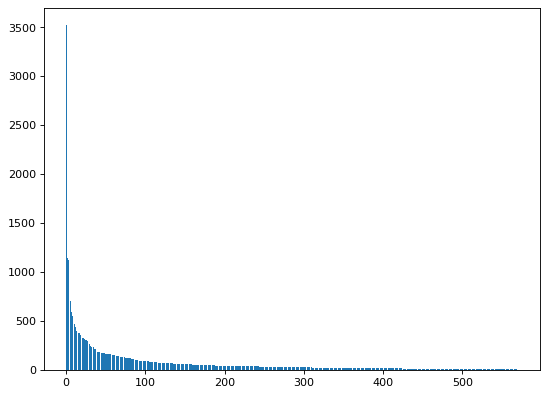

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(1,len(freq)), freq.iloc[range(1, len(freq)), :]['Count'])
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/pickles_object/topic_model_clear_text.pickle', "rb") as f:
  topic_model_clear_text = pickle.load(f)

with open('/content/drive/MyDrive/pickles_object/topics_clear_text.pickle', "rb") as f:
  topics_clear_text = pickle.load(f)

with open('/content/drive/MyDrive/pickles_object/probs_clear_text.pickle', "rb") as f:
  probs_clear_text= pickle.load(f)

with open('/content/drive/MyDrive/pickles_object/docs.pickle', "rb") as f:
  docs= pickle.load(f)

In [ ]:
topic_model_clear_text.visualize_topics()

In [ ]:
new_topics , new_probs = topic_model_clear_text.reduce_topics(clear_text, topics_clear_text, probs_clear_text, nr_topics=50)

2022-05-23 18:57:20,260 - BERTopic - Reduced number of topics from 570 to 51


In [ ]:
topic_model_clear_text.visualize_topics()

In [ ]:
# topic modeling days

In [6]:
frac = 0.05
res = sub_sample(dfs, random_state, frac)

In [17]:
for el in res:
  print(len(el[el.Language == "en"]))

8894
13990
10672
72937
52315
47913
44170
39295
38266
32116
29115
28706


In [7]:
tqdm.pandas()
list_docs = []
for df in res:
  df =df[df.Language == "en"]
  doc = df.Text.swifter.apply(en)
  list_docs.append(doc)

Pandas Apply:   0%|          | 0/44170 [00:00<?, ?it/s]

In [8]:
import pickle

for i, el in enumerate(list_docs):
  path = '/content/drive/MyDrive/docs' + str(6) + '.pickle'
  with open(path, 'wb') as handle:
    pickle.dump(el, handle, protocol=pickle.HIGHEST_PROTOCOL)